In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [9]:
with open('bandit_results.json') as json_data:
    data = json.load(json_data)
    json_data.close()
print(data)
print(data[0])

[{'pkg_name': 'AChemKit', 'pkg_version': '0.1.0', 'published': {'date': '2011-04-08', 'time': '11:37'}, 'num_issues': 18, 'issue_severity': {'NULL': 0, 'LOW': 18, 'MEDIUM': 0, 'HIGH': 0, 'CRITICAL': 0}}, {'pkg_name': 'AChemKit', 'pkg_version': '0.1.1', 'published': {'date': '2011-04-08', 'time': '11:56'}, 'num_issues': 25, 'issue_severity': {'NULL': 0, 'LOW': 25, 'MEDIUM': 0, 'HIGH': 0, 'CRITICAL': 0}}, {'pkg_name': 'AChemKit', 'pkg_version': '0.1.2', 'published': {'date': '2011-04-08', 'time': '12:15'}, 'num_issues': 25, 'issue_severity': {'NULL': 0, 'LOW': 25, 'MEDIUM': 0, 'HIGH': 0, 'CRITICAL': 0}}, {'pkg_name': 'AChemKit', 'pkg_version': '0.2.0', 'published': {'date': '2011-05-06', 'time': '11:34'}, 'num_issues': 24, 'issue_severity': {'NULL': 0, 'LOW': 24, 'MEDIUM': 0, 'HIGH': 0, 'CRITICAL': 0}}, {'pkg_name': 'AChemKit', 'pkg_version': '0.3.0', 'published': {'date': '2011-09-09', 'time': '14:32'}, 'num_issues': 22, 'issue_severity': {'NULL': 0, 'LOW': 22, 'MEDIUM': 0, 'HIGH': 0, '

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


371


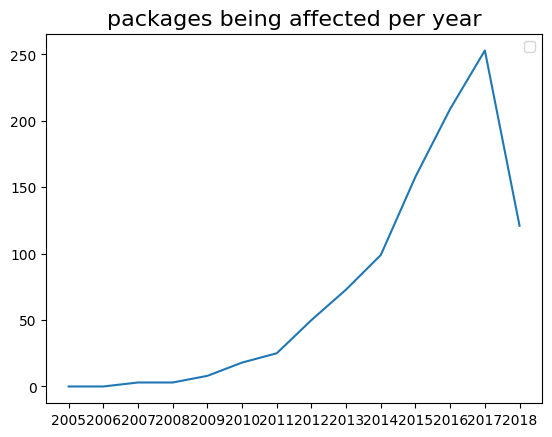

<Figure size 640x480 with 0 Axes>

In [27]:
def yearly_severity_plot(fig: int = 1):
  packages = []
  #number of total packages
  packages_per_year = {}
  # number of vulnerable packages
  vuln_packages_per_year = {}
  # number of vulnerabilities
  vulnerabilities_per_year = {}
  # number of vulnerabilities per severity
  severities_per_year = {}
  # fill packages with list of packages
  severities = ["NULL", "LOW", "MEDIUM", "HIGH", "CRITICAL"]
  for version in data:

    package_name = version['pkg_name']
    if version["published"]["date"] is not None:
      year = version["published"]["date"].split("-")[0]
      # add to total packages or add year
      if year in packages_per_year:
        if package_name not in packages_per_year[year]:
          packages_per_year[year].append(package_name)
      else:
        packages_per_year[year] = [package_name]
        vuln_packages_per_year[year] = []
        vulnerabilities_per_year[year] = 0
        severities_per_year[year] = {
              "NULL": 0,
              "LOW": 0,
              "MEDIUM": 0,
              "HIGH": 0,
              "CRITICAL": 0
              }

      # add vulnerabilitites
      if version['num_issues'] > 0:
        if package_name not in vuln_packages_per_year[year]:
          vuln_packages_per_year[year].append(package_name)
          for sev in severities:
            severities_per_year[year][sev] = int(severities_per_year[year][sev]) + int(version["issue_severity"][sev])

  print(len(packages_per_year["2017"]))
  years = sorted(list(packages_per_year.keys()))

  package_num = [0]
  vuln_pack_num = []
  low = []
  medium = []
  high = []
  critical = []

  for year in years:
    package_num.append( len( packages_per_year[year] ) )
    vuln_pack_num.append(len(vuln_packages_per_year[year]))
    low.append(severities_per_year[year]["LOW"])
    medium.append(severities_per_year[year]["MEDIUM"])
    high.append(severities_per_year[year]["HIGH"])
    critical.append(severities_per_year[year]["CRITICAL"])
    
  if fig == 1:
    plt.title('packages being affected per year', fontsize=16)
    plt.plot(years, vuln_pack_num)
  elif fig == 2:
    plt.title('packages being affected per year by severity levels', fontsize=16)
    #plt.plot(years, vuln_pack_num)
  elif fig == 3:
    plt.title('Kaplan-Meier survival probability', fontsize=16)
    #plt.plot(years, vuln_pack_num)
  elif fig == 4:
    plt.title('Kaplan-Meier survival probability broken by severity', fontsize=16)
    #plt.plot(years, vuln_pack_num)
  elif fig == 5:
    plt.title('Vulnerability percentages according to first fixed version release time', fontsize=16)
    #plt.plot(years, vuln_pack_num)
  elif fig == 6:
    plt.title('Kaplan-Meier survival probability after discovery', fontsize=16)
    #plt.plot(years, vuln_pack_num)


  plt.legend()
  plt.figure()

yearly_severity_plot(1)

# New section

ValueError: x and y must have same first dimension, but have shapes (0,) and (14,)

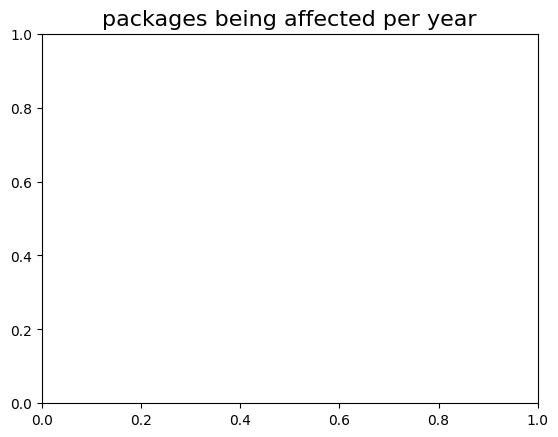

In [15]:
plt.title('packages being affected per year', fontsize=16)
plt.plot(years, vuln_pack_num)

plt.legend()
plt.figure()

In [ ]:
    plt.title('packages being affected per year', fontsize=16)
    ax.legend()
    plt.show(years, [low, medium, high, critical])